# TERM PROJECT  : THE WORK VISA PROBLEM
### Rensselaer Polytechnic Institute



 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

A little intro about the Work Visa process :  
- The Work Visa in the United States is designated and colloquially referred to as the "H-1B" visa. 
- It allows Foreign Nationals to work in the country for up to 6 years including a 3 year extension.
- The H-1B's are assigned based PURELY on a lottery.

This project attempts to approximate the H-1B process. Since this is a dataset about H-1B Applications, I will attempt to create a dependent variable from the application status. This is a crucial step that should help approximate the process. 

The data for this dataset is sourced from Kaggle.com (source : https://www.kaggle.com/nsharan/h-1b-visa).

The project involves use of Python and R programming languages and a few of the EDA charts are generated using Tableau.

 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

## Table of Contents : 

### <a href='#the_destination1'>1. Loading the libraries </a>
### <a href='#the_destination2'>2. Data Transformation  </a>
###  <a href='#the_destination3'>3. Text Analysis and Feature Creation </a>
###  <a href='#the_destination4'>4. Exploratory Data Analysis </a>
###  <a href='#the_destination5'>5. Correlation Analysis </a>
###  <a href='#the_destination6'>6. Sampling and checking for representativeness </a>
###  <a href='#the_destination7'>7. Model Construction </a>
###  <a href='#the_destination8'>8. Observations and Conclusions </a>
###  <a href='#the_destination9'>9. Questions Answered </a>

 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

<a id='the_destination1'></a>
### 1. Loading the libraries 

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv("/Users/anuragkaushik/Documents/Data Analytics/Term Project/h-1b-visa/h1b_kaggle.csv")

In [3]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

This dataset has 3002458 rows, and 11 columns


 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

<a id='the_destination2'></a>
### 2. Data Transformation

#### 2.1 Handling Missing values

Total Missing Values - 

In [5]:
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

The Year variable has 13 missing values only. Thats 13 missing observations among 3 million observations. We can safely drop these values.

In [6]:
df['YEAR'].fillna(0, inplace=True)
df.YEAR = df.YEAR.astype(int)
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


Case status describes the status of the H1-B application. NOT the result. We deal with this problem later in Data Transformation part 2.

In [7]:
df['CASE_STATUS'].fillna('NO RESULT', inplace=True)
df['status'] = df['CASE_STATUS']

In [8]:
df.CASE_STATUS.unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'NO RESULT'], dtype=object)

In [9]:
df = df.replace({'status': 
                 {'CERTIFIED-WITHDRAWN': 0, 
                  'WITHDRAWN': 0, 
                  'CERTIFIED': 1, 
                  'DENIED': 0,
                  'REJECTED':0,
                  'INVALIDATED':0,
                  'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED':0,
                  'NO RESULT':0
                 }
                })

# ------------------------------------------------------------------------------------------------------------------- #

print("Null values in SOC_NAME: ", df.SOC_NAME.isnull().sum() )

df['SOC_NAME'].fillna('NOT DEFINED', inplace = True)

Null values in SOC_NAME:  17734


The SOC_NAME is not that useful as it is similar to job title and we don't use this variable for analysis as we might encounter a problem of multi-collinearity

The Worksite variable helps us derive two new variables : State and City.

Recoding Full time variable into zeroes and ones to make it easier for modeling

Also imputing the mean for salaries that have missing values. Again there are just about 85 missing observations for salary among 3 million total observations so imputing the mean will not skew the data by a significant amount.

In [10]:
df['STATE'] = df['WORKSITE'].apply(lambda x: x.split(',')[1]).astype(np.str)
df['CITY'] = df['WORKSITE'].apply(lambda x: x.split(',')[0]).astype(np.str)

# ------------------------------------------------------------------------------------------------------------------- #

df['full_time'] = np.where(df['FULL_TIME_POSITION']=='Y', 1, 0)

# ------------------------------------------------------------------------------------------------------------------- #

df.isnull().sum()
df['salary'] = df['PREVAILING_WAGE']
df['salary'].fillna(df['salary'].mean(), inplace=True)

In [11]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,status,STATE,CITY,full_time,salary
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,0,MICHIGAN,ANN ARBOR,0,36067.0
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843,0,TEXAS,PLANO,1,242674.0
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,0,NEW JERSEY,JERSEY CITY,1,193066.0
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236,0,COLORADO,DENVER,1,220314.0
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003,0,MISSOURI,ST. LOUIS,1,157518.4


<a id='the_destination3'></a>
### 3. Text Analysis and Feature Creation

This is where the Natural Language Tool Kit (NLTK) package in Python really comes into play. The NLTK helps to clean the text data and also create a few useful features.

#### 3.1 Feature 1 : Job type : Is it STEM or non-STEM

In [12]:
df.JOB_TITLE.fillna('NOT DEFINED', inplace=True)
df.JOB_TITLE = df.JOB_TITLE.astype(np.str)

# Function that strips a sentence by space.
strip = lambda x: ' '.join(x).strip() 

# Join the sentence together in the form of a list of words.
df['job'] = [','.join(z).strip() for z in df['JOB_TITLE']] 
df['job'] = df.JOB_TITLE.str.split(' ')
df['job'] = df['job'].astype('str') # didnt work. Run it nonetheless

# Converting to lower case for ease of use.
df['job'] = df['job'].str.lower() 
df.job.head(15)

# ------------------------------------------------------------------------------------------------------------------- #

#We can start to create little small functions that will find a string.
def has_title(name):
    for s in ['engineering', 'computer', 'mechanical',
              'electrical', 'research', 'engineer', 'design',
              'financ','finance','financial', 'data', 'program', 'programmer', 'information', '|nformation',
             'doctor','doct','industrial','production','scientist','science','math',
              'mathematics','analyst','developer','software'
             'graphic','hacker','quality','web','repair','operator','analytics','doctorate','PhD','research']:
        if name.find(s) >= 0:
            return True
    return False

# ------------------------------------------------------------------------------------------------------------------- #
            
            
#Now we are using that separate function in another function.  
title_fn = lambda x: 1 if has_title(x) else 0


#Finally, we call the function for name
df['stem_job'] = df['job'].map(title_fn)




#### 3.2 Feature 2: State: East Coast, West Coast, south(Texas) and mich_clust (the area around Lake Michigan)
This is more evident in the EDA section that follows as it can be seen on the map as to how these features are created.

In [13]:
east_coast = pd.Series(['Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island', 
              'Connecticut', 'New York', 'New Jersey', 'Pennsylvania', 'Delaware', 
              'Maryland', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia',
              'Florida'])
east_coast = east_coast.str.upper()


west_coast = pd.Series(['California', 'Oregon', 'Washington', 'Alaska', 'Hawaii'])
west_coast = west_coast.str.upper()

texas_south = pd.Series(['texas', 'Texas', 'gibberish']) # It won't just take 'Texas' as an argument.
texas_south = texas_south.str.upper()

mich_clust = pd.Series(['Wisconsin','Indiana','Illinois', 'Michigan'])
mich_clust = mich_clust.str.upper()

# ------------------------------------------------------------------------------------------------------------------- #

def east(name):
    for s in east_coast:
        if name.find(s) >= 0:
            return True
    return False

def west(name):
    for s in west_coast:
        if name.find(s) >= 0:
            return True
    return False

def texasx(name):
    for s in texas_south:
        if name.find(s) >= 0:
            return True
    return False

def mich(name):
    for s in mich_clust:
        if name.find(s) >= 0:
            return True
    return False

# ------------------------------------------------------------------------------------------------------------------- #
            
title_fn1 = lambda x: 1 if east(x) else 0

# East Coast
df['east_coast'] = df['STATE'].map(title_fn1)

# West Coast
title_fn2 = lambda x: 1 if west(x) else 0
df['west_coast'] = df['STATE'].map(title_fn2)

# South
title_fn3 = lambda x: 1 if texasx(x) else 0
df['south'] = df['STATE'].map(title_fn3)

# Lake Michigan area
title_fn4 = lambda x: 1 if mich(x) else 0
df['mich_clust'] = df['STATE'].map(title_fn4)

In [14]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,...,STATE,CITY,full_time,salary,job,stem_job,east_coast,west_coast,south,mich_clust
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,...,MICHIGAN,ANN ARBOR,0,36067.0,"['postdoctoral', 'research', 'fellow']",1,0,0,0,1
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,...,TEXAS,PLANO,1,242674.0,"['chief', 'operating', 'officer']",0,0,0,1,0
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,...,NEW JERSEY,JERSEY CITY,1,193066.0,"['chief', 'process', 'officer']",0,1,0,0,0
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,...,COLORADO,DENVER,1,220314.0,"['regional', 'presiden,', 'americas']",0,0,0,0,0
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,...,MISSOURI,ST. LOUIS,1,157518.4,"['president', 'mongolia', 'and', 'india']",0,0,0,0,0


Deleting the unncessary extra columns

In [15]:
df['state'] = df['STATE']
df['year'] = df['YEAR']
df['longitude'] = df['lon']
df['latitude'] = df['lat']

del df['CASE_STATUS']
del df['WORKSITE']
del df['job']
del df['FULL_TIME_POSITION']
del df['STATE']
del df['CITY']
del df['EMPLOYER_NAME']
del df['SOC_NAME']
del df['JOB_TITLE']
del df['Unnamed: 0']
del df['PREVAILING_WAGE']
del df['YEAR']
#del df['STATE']
del df['lon']
del df['lat']

In [16]:
dfnew = df[df['year']>0] # The missing values in Year are dropped as discussed in Data Transformation part 1.
dfnew.head()

,status,full_time,salary,stem_job,east_coast,west_coast,south,mich_clust,state,year,longitude,latitude
0,0,0,36067.0,1,0,0,0,1,MICHIGAN,2016,-83.743038,42.280826
1,0,1,242674.0,0,0,0,1,0,TEXAS,2016,-96.698886,33.019843
2,0,1,193066.0,0,1,0,0,0,NEW JERSEY,2016,-74.077642,40.728158
3,0,1,220314.0,0,0,0,0,0,COLORADO,2016,-104.990251,39.739236
4,0,1,157518.4,0,0,0,0,0,MISSOURI,2016,-90.199404,38.627003


In [17]:
dfnew.to_csv('/Users/anuragkaushik/Documents/Data Analytics/Term Project/h-1b-visa/h1b_cleaned1.csv')

 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

# Kernel Change

 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

### Data Tranformation part 2

##### The need for another round of data transformation: 
- The dataset is actually one about the number of H1-B APPLICATIONS and not one of the results. There is no direct method to find a dataset like that. 
- The US H1-B visas are assigned purely based on a lottery which yields about 30% positive results every year.
- Thus random sampling of the dataset and assigning about 70% of the values to be zero. 

In [ ]:
library('tidyverse')
library(grid)
library(gridExtra)

In [2]:
df <- read.csv('/Users/anuragkaushik/Documents/Data Analytics/Term Project/h-1b-visa/h1b_cleaned1.csv')
df$X <- NULL

#### !Warning! : the below block of code takes 3 hours to run. only run it when needed

In [9]:
m <- dim(df)[1] # Select the rows of dataset
val <- sample(1:m, size = round(m/3), replace = FALSE, prob = rep(1/m, m)) # sample randomly

# ------------------------------------------------------------------------------------------------------------------- #

# Making 2 datasets

df.learn <- df[-val,] 	# make cases_status = 0

df.valid <- df[val,]	# make case_status = 1


# ------------------------------------------------------------------------------------------------------------------- #

# Assigning 60% of the dataset dependent variable to be zero :

# 'Visa Status' will be the new dependent variable.

df.learn$visa_status <- 0
#sum(df.learn$visa_status) # Checking

df.valid$visa_status <- df.valid$status 

#sum(df.valid$visa_status) # Checking

dfnew <- rbind(df.learn, df.valid)
#nrow(dfnew) # Number of rows in the final dataset

#sum(dfnew$visa_status) #is it the same as df.valid?

#sum(dfnew$visa_status)/nrow(dfnew)

# ------------------------------------------------------------------------------------------------------------------- #

# Randomizing the dataset
dfnew <- dfnew[sample(nrow(dfnew)),]

Saving the dataset and re-loading it so that it can be accessed at any time : 

In [13]:
write.csv(dfnew, file = "/Users/anuragkaushik/Documents/Data Analytics/Term Project/h-1b-visa/Final_Cleaned.csv")

In [2]:
dfnew <- read.csv('/Users/anuragkaushik/Documents/Data Analytics/Term Project/h-1b-visa/Final_Cleaned.csv')

# ------------------------------------------------------------------------------------------------------------------- #

dfnew$X <- NULL
dfnew$lon <- NULL
dfnew$lat <- NULL


dfnew <- dfnew[,c("visa_status", "full_time","salary","stem_job",
                  "east_coast","west_coast","south","mich_clust","state","year","longitude","latitude","status")]

head(dfnew)

visa_status,full_time,salary,stem_job,east_coast,west_coast,south,mich_clust,state,year,longitude,latitude,status
0,1,84906.0,1,0,0,0,1,ILLINOIS,2015,-88.08341,42.03336,1
1,1,77563.0,0,0,1,0,0,CALIFORNIA,2015,-121.88633,37.33821,1
1,1,80038.0,0,1,0,0,0,MASSACHUSETTS,2015,-71.27601,42.49062,1
0,1,40622.4,1,1,0,0,0,NEW YORK,2012,-77.61092,43.16103,0
0,1,67155.0,0,0,1,0,0,CALIFORNIA,2014,-122.14302,37.44188,1
0,1,60965.0,0,1,0,0,0,GEORGIA,2012,-84.38798,33.74900,1


 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

<a id='the_destination4'></a>
### 4. Exploratory Data Analysis

#### How many applications every year?
#### How many of them are STEM?

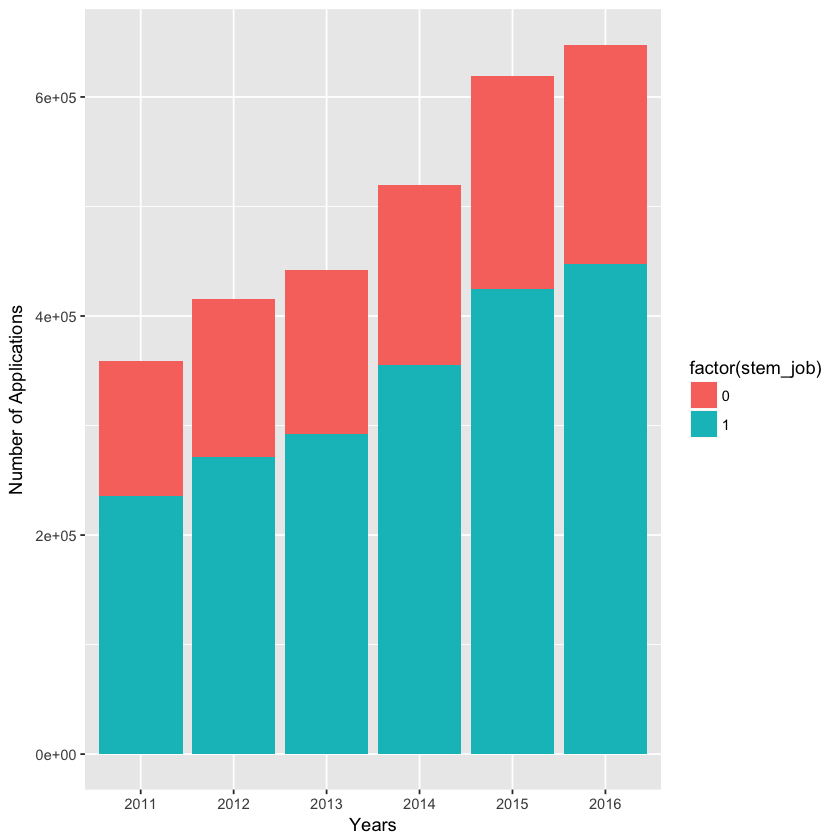

In [20]:
qplot(factor(year), data=dfnew, geom="bar", fill=factor(stem_job), xlab = "Years", ylab = "Number of Applications")

The number of applications grow from 2011 to 2016. The majority of visa applications are for STEM jobs

#### Which state has the highest number of H1-B applicants? How many of these are STEM applications?

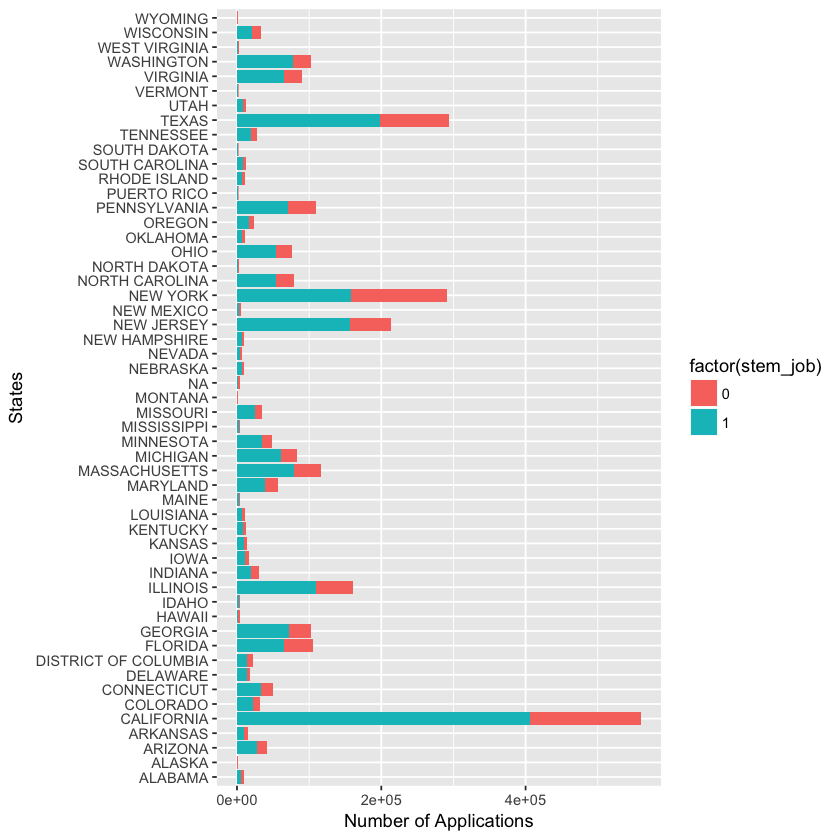

In [21]:
qplot((factor(state)), data=dfnew, geom="bar", fill=factor(stem_job),xlab = "States", ylab = "Number of Applications") + coord_flip()


California leads the pack by a very large amount. Texas, New York, New Jersey and Illinois follow but are considerably lower than California

### Silicon Valley's located on the West Coast. However, that doesnt mean the west coast has the most number of jobs. Are there more jobs on the West coast than on the East Coast?

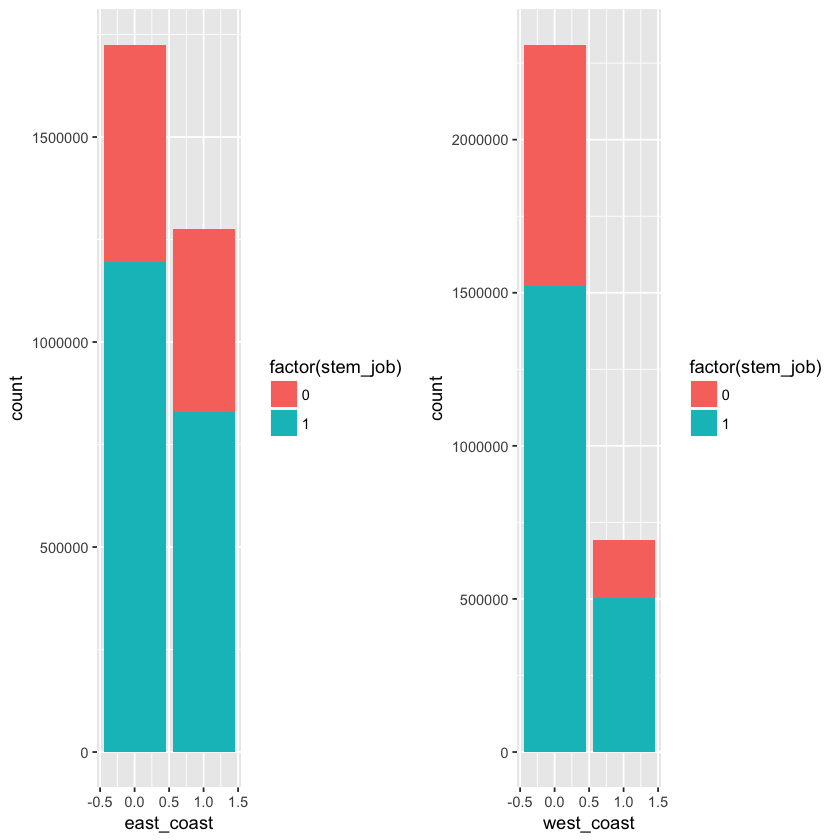

In [78]:
h1 <- qplot(east_coast, data=dfnew, geom="bar", fill=factor(stem_job))
h2 <- qplot(west_coast, data=dfnew, geom="bar", fill=factor(stem_job))
grid.arrange(h1,h2, ncol =2)

There clearly are more job applications from the West Coast as compared to the East Coast.

#### How does it look on the map?

In [20]:
library(ggmap)
library(ggplot2)

Google Maps API Terms of Service: http://developers.google.com/maps/terms.
Please cite ggmap if you use it: see citation("ggmap") for details.


In [21]:
map<-get_map(location='united states', zoom=4, maptype = "terrain",
             source='google',color='color')

Source : https://maps.googleapis.com/maps/api/staticmap?center=united+states&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN
Source : https://maps.googleapis.com/maps/api/geocode/json?address=united%20states


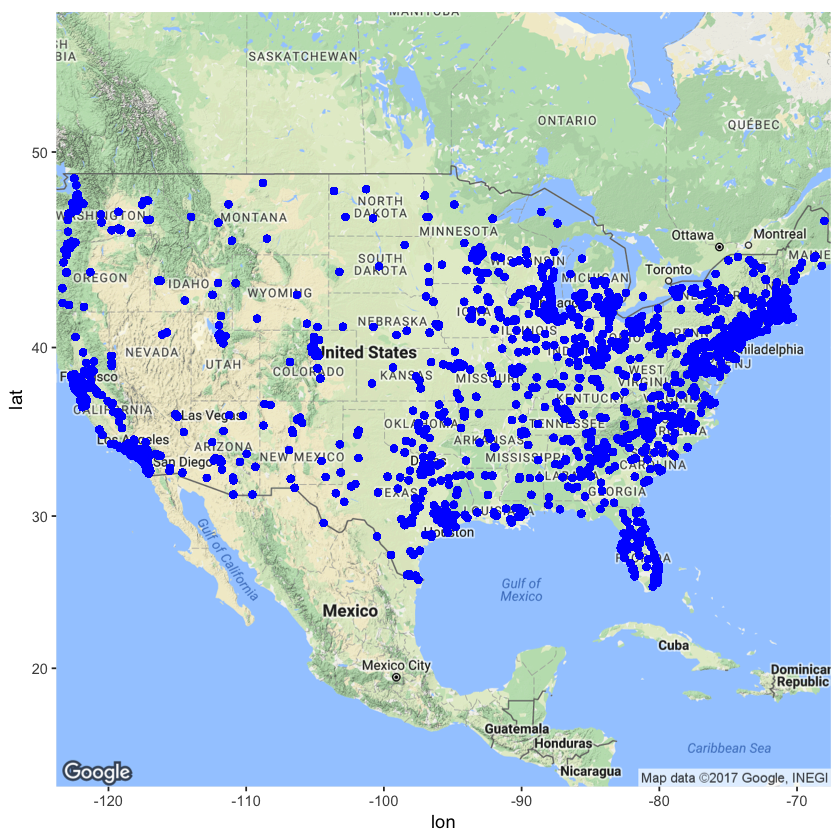

In [22]:
ggmap(map) + geom_point(aes(x= longitude, y= latitude), data=dfnew, alpha=.5, na.rm = T, color = "blue")

This map helped me create the state based features (east coast, west coast, texas and lake michigan area). It also confirms the results of the bar chart.

#### What is the range of salaries for Foreign nationals working in the country?

In [92]:
summary(dfnew$salary)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 5.437e+04 6.502e+04 1.470e+05 8.143e+04 6.998e+09 

Warning message:
“Removed 10584 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 10584 rows containing non-finite values (stat_boxplot).”

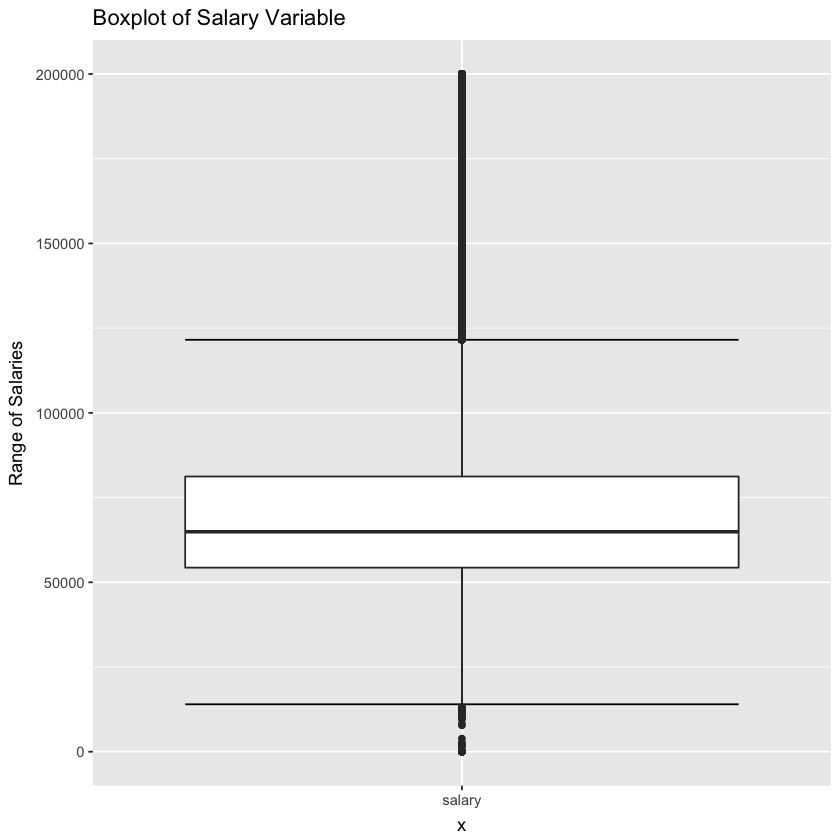

In [100]:
ggplot(dfnew, aes(x = "salary", y = salary))  + 
 stat_boxplot(geom ='errorbar') + geom_boxplot() + 
scale_y_continuous(name = "Range of Salaries", limits=c(0, 200000)) + ggtitle("Boxplot of Salary Variable") # shorthand for  stat_boxplot(geom='boxplot')

There are many many outliers. About 10,000 of them cannot be displayed on the graph and hence the warning message

#### Which employers are the largest H-1B applicants?

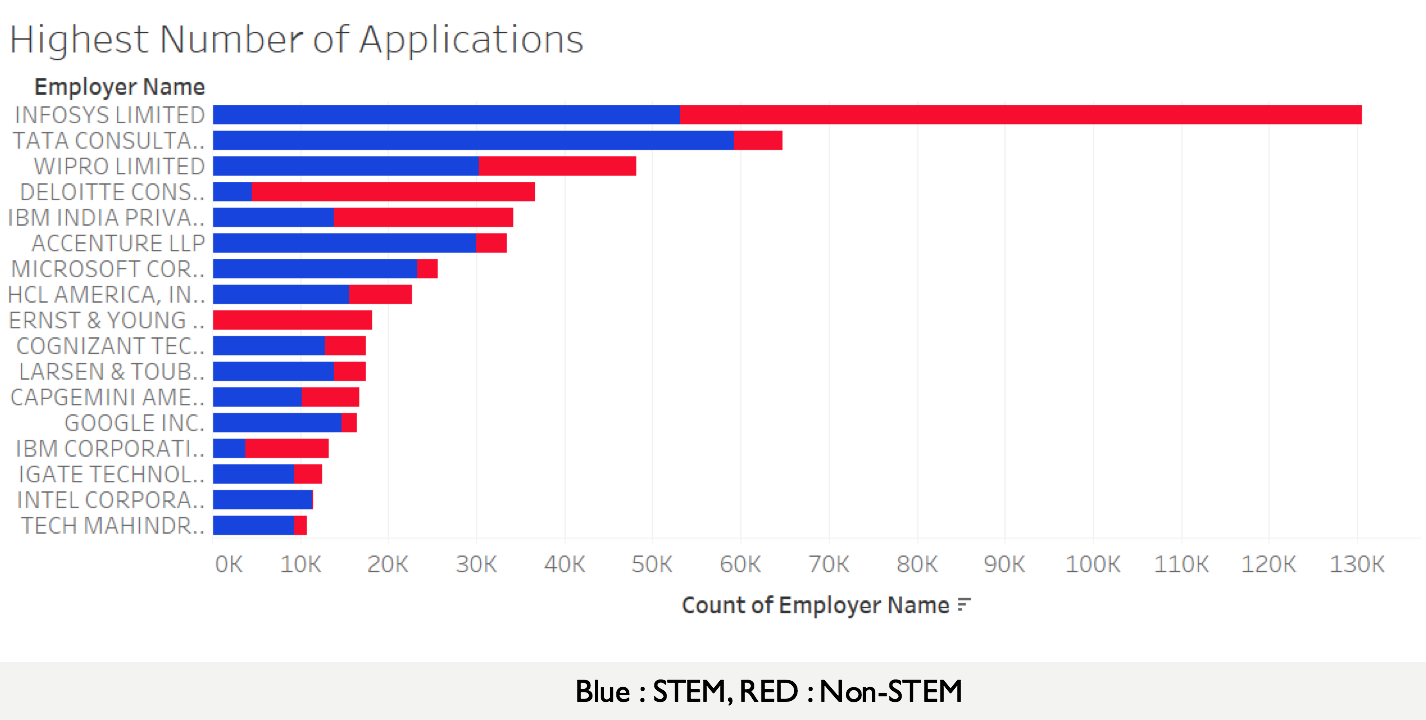

In [22]:
from IPython.display import Image
Image(filename='/Users/anuragkaushik/Desktop/tableau_pic.png')

4 out of the top 5 companies are Indian companies. Infosys is out of the game this year as it has decided not to apply for H-1Bs. This frees up nearly 25,000 slots for other employers

#### Who are the highest paying employers for foreign nationals?

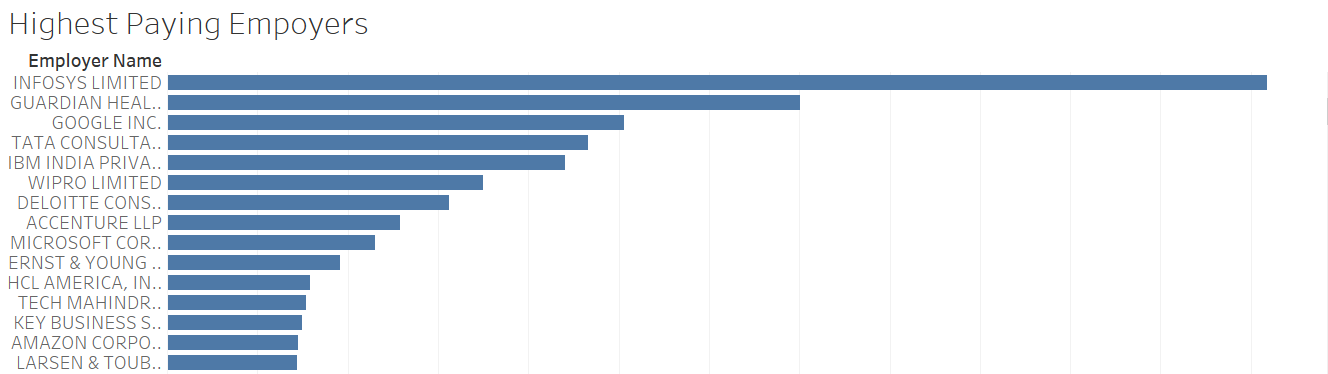

In [1]:
from IPython.display import Image

Image(filename='/Users/anuragkaushik/Desktop/Capture2.png')

Infosys was expected to be high as it also has the highest number of H-1B applications.

### Boxplots of Full time status and Stem status vs salary

Warning message:
“Removed 10584 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 10584 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 10584 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 10584 rows containing non-finite values (stat_boxplot).”

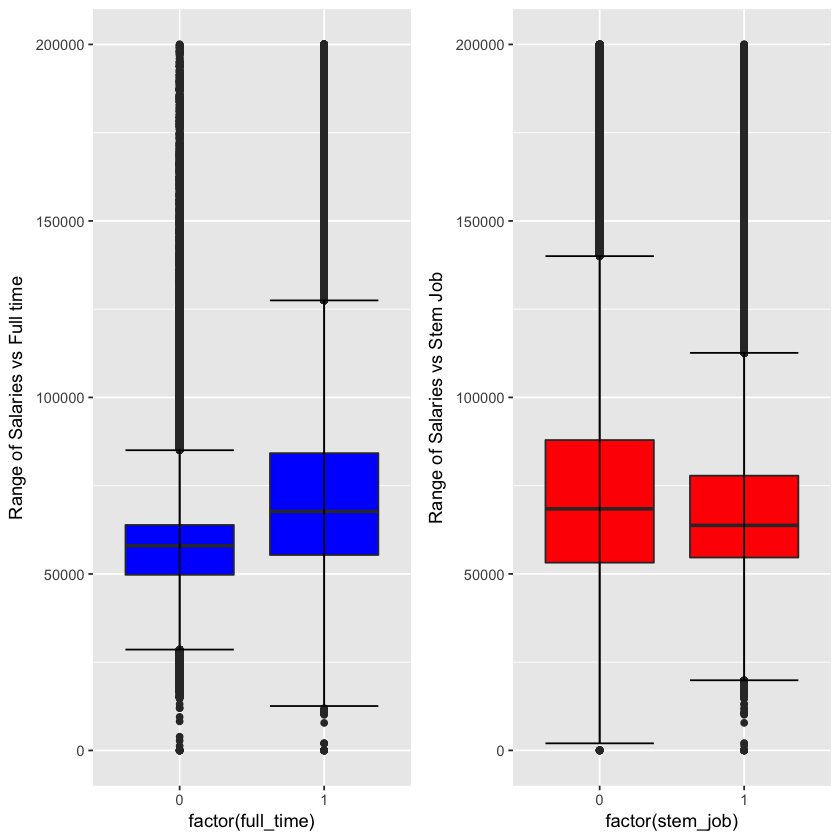

In [7]:
p1  <-  ggplot(dfnew, aes(factor(full_time), salary)) + 
geom_boxplot(fill = "blue") + stat_boxplot(geom ='errorbar') + 
scale_y_continuous(name = "Range of Salaries vs Full time", limits=c(0, 200000))
#p1

p2  <-  ggplot(dfnew, aes(factor(stem_job), salary)) + 
geom_boxplot(fill = "red") + stat_boxplot(geom ='errorbar') + 
scale_y_continuous(name = "Range of Salaries vs Stem Job", limits=c(0, 200000))
#p2

grid.arrange(p1, p2, ncol = 2)

People working full time tend to earn more on average whereas people in non-STEM positions seem to be earning more.

### Relationship between Salary and year of application

Warning message:
“Removed 10584 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 10584 rows containing non-finite values (stat_boxplot).”

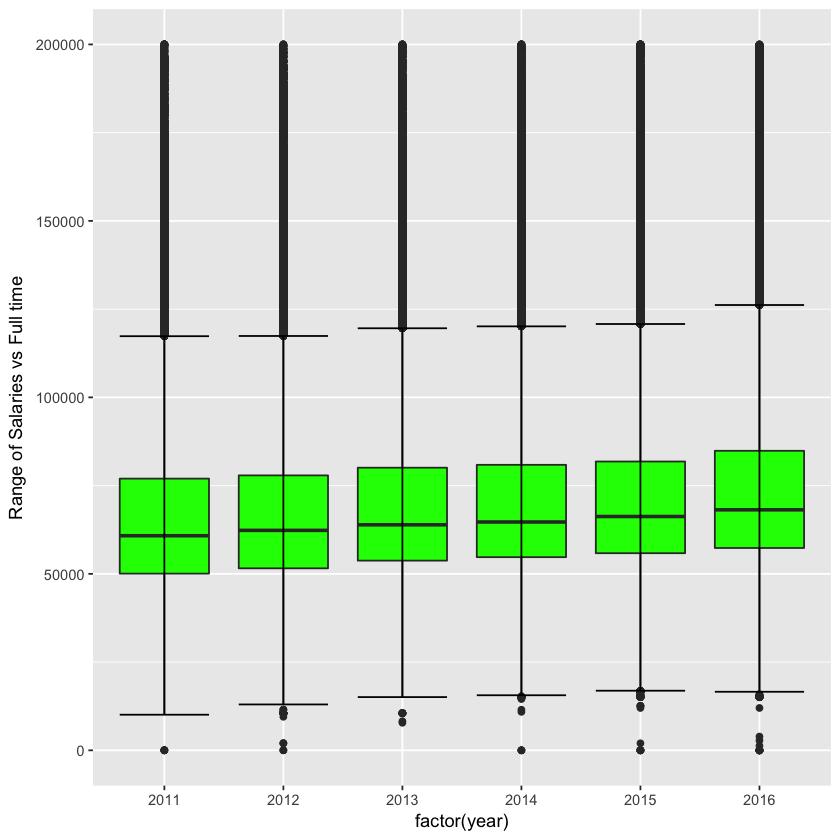

In [8]:
p3  <-  ggplot(dfnew, aes(factor(year), salary)) + 
geom_boxplot(fill = "green") + stat_boxplot(geom ='errorbar') + 
scale_y_continuous(name = "Range of Salaries vs Full time", limits=c(0, 200000))
p3

Salaries have increased steadily between 2011 and 2016

In [23]:
### Save file for python.
con<-file('/Users/anuragkaushik/Documents/Data Analytics/Term Project/h-1b-visa/Modeling_Dataset.csv',encoding="UTF-8")
write.csv(dfnew,file=con)

 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

<a id='the_destination5'></a>
### 5. Correlation Analysis


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



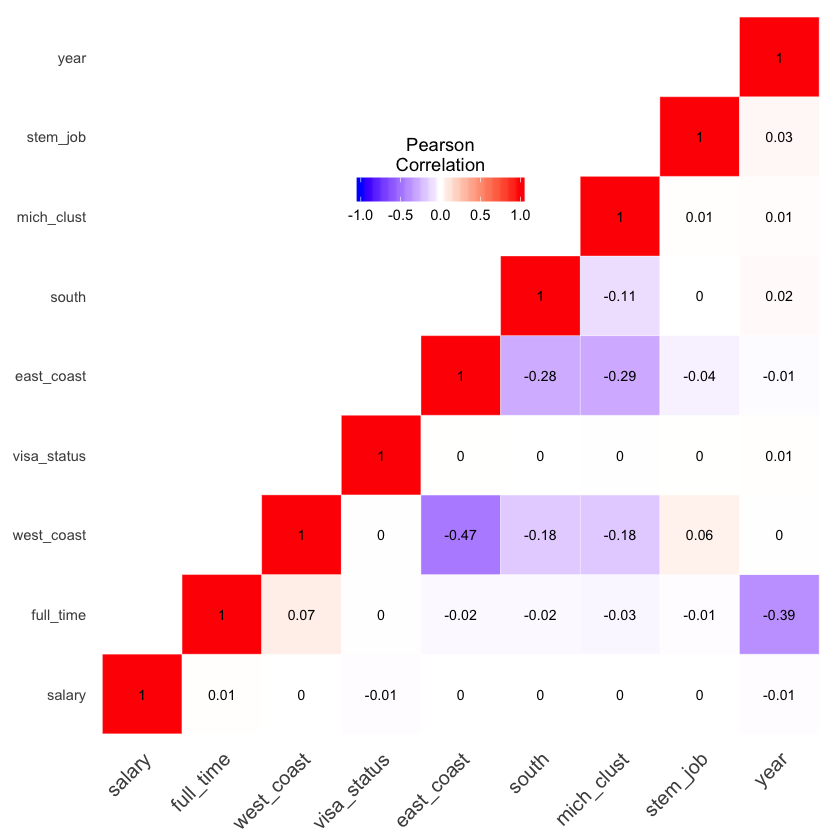

In [24]:
df2 <- dfnew
df2$state <- NULL
df2$status <- NULL

df2$longitude <- NULL
df2$latitude <- NULL

# ------------------------------------------------------------------------------------------------------------------- #

library(ggplot2)
library(reshape2)
#(cor(df1) ) # correlation matrix
cormat <- cor(df2)
melted_cormat <- melt(cor(df2))

# ------------------------------------------------------------------------------------------------------------------- #

# Get lower triangle of the correlation matrix
  get_lower_tri <- function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
  }
  # Get upper triangle of the correlation matrix
  get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)] <- NA
    return(cormat)
  }

upper_tri <- get_upper_tri(cormat)
#upper_tri
# Melt the correlation matrix
library(reshape2)
melted_cormat <- melt(upper_tri, na.rm = TRUE)

# ------------------------------------------------------------------------------------------------------------------- #

# Heatmap
reorder_cormat <- function(cormat){
# Use correlation between variables as distance
dd <- as.dist( (1-cormat)/2)
hc <- hclust(dd)
cormat <- cormat[hc$order, hc$order]
}

# Reorder the correlation matrix
cormat <- reorder_cormat(cormat)

 upper_tri <- get_upper_tri(cormat)

# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white",
   midpoint = 0, limit = c(-1,1), space = "Lab",
    name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(angle = 45, vjust = 1,
    size = 12, hjust = 1))+
 coord_fixed()

# ------------------------------------------------------------------------------------------------------------------- #

# Print the heatmap
#print(ggheatmap)
ggheatmap + geom_text(aes(Var2, Var1, label = round(value,2) ), color = "black", size = 3) + theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.grid.major = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    axis.ticks = element_blank(),
    legend.justification = c(1, 0),
    legend.position = c(0.6,0.7),
    legend.direction = "horizontal") + guides(fill = guide_colorbar(barwidth = 7, 
                                                                    barheight = 1, 
                                                                    title.position = "top", title.hjust = 0.5))



There are some obvious negative correlations between the different state-based variables. STEM Jobs and the West Coast as well as Full time and the West Coast, seem to have a strong correlation, one which is expected considering that Silicon Valley is based in California.
Year and Salary are correlated with visa status.

 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

<a id='the_destination6'></a>
### 6. Sampling and checking for representativeness

Since Machine Learning algorithms fail for large datasets, I will take a random sample of the dataset and check for the representativeness of the sample.
The Hypothesis is that I will arrive at a representative sample

In [9]:
trial_set <- dfnew[sample(5000),]

In [10]:
head(trial_set)

,visa_status,full_time,salary,stem_job,east_coast,west_coast,south,mich_clust,state,year,longitude,latitude,status
154,0,1,50710,1,0,0,0,1,INDIANA,2013,-86.15807,39.76840,1
3754,0,1,107432,1,0,0,0,0,ARIZONA,2014,-111.94001,33.42551,0
4549,1,1,82576,1,0,1,0,0,CALIFORNIA,2016,-122.03218,37.32300,1
3266,1,1,53394,1,1,0,0,0,VIRGINIA,2011,-77.17726,38.93387,1
838,0,1,67344,1,0,1,0,0,CALIFORNIA,2013,-121.49440,38.58157,0
4088,0,1,103854,1,1,0,0,0,MASSACHUSETTS,2011,-71.05888,42.36008,1


Assuming the law of large numbers, we can state that the variables of the dataset is normally distributed. Thus the sample will also be normally distributed as it is drawn from a normally distributed sample.

### Verifying with the KS Test

- Null : The sample is drawn from the population
- Alternate : The sample is drawn from the population

In [17]:
ks.test(dfnew$salary, trial_set$salary,paired=TRUE)

Warning message in ks.test(dfnew$salary, trial_set$salary, paired = TRUE):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  dfnew$salary and trial_set$salary
D = 0.0065786, p-value = 0.9821
alternative hypothesis: two-sided


Null Hypothesis holds : The sample is drawn from the population

### T-Test

Used to determine if the sample and population means are different.

- Null : Means are equal

- Alternate : Means are not equal

In [19]:
t.test(trial_set$salary, mu = mean(dfnew$salary),alternative="two.sided")


	One Sample t-test

data:  trial_set$salary
t = 0.87493, df = 4999, p-value = 0.3817
alternative hypothesis: true mean is not equal to 146998.4
95 percent confidence interval:
  49781.35 400932.59
sample estimates:
mean of x 
   225357 


Null Hypothesis holds : The sample and population means are NOT significantly different

### F-Test
Used to determine if the sample and population variances are different. They are expected to be different in this case as the sample is a fraction of the population.
- Null : Variances are equal
- Alternate : Variances are not equal

In [15]:
var.test(dfnew$salary, trial_set$salary,alternative="two.sided")


	F test to compare two variances

data:  dfnew$salary and trial_set$salary
F = 0.69713, num df = 3002400, denom df = 4999, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6700695 0.7247273
sample estimates:
ratio of variances 
         0.6971342 


Alternate Hypothesis holds : Sample and population variances are not the same. Confirms our hypothesis.

Conclusion : Even though the sample and population variance are not the same, the very fact that the means are not significantly different from each other and hence a sample of 5000 observations can be used for modeling instead of the entire dataset.

 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

# Kernel Change

 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import sklearn

<a id='the_destination7'></a>
### 7. Model Construction

The reason for modeling is to be able to mimic the H-1B process. Thus the dependent variable is visa status.

###### Measure of Accuracy : Percentage of the total number values correctly classified.

It is the sum of the diagonal divided by the total number of classified observations in a confusion matrix.
The 'model.score' function built-into scikit learn does that directly.

In [4]:
df = pd.read_csv('/Users/anuragkaushik/Documents/Data Analytics/Term Project/h-1b-visa/Modeling_Dataset.csv')
del df['Unnamed: 0']
del df['state']
del df['longitude']
del df['latitude']
del df['status']

In [5]:
df['salary'] = df['salary'].astype(np.int64)

In [6]:
trial_set = df.sample(n=5000)

I will be using 2 techniques for Cross Validating models : the train test split and the 10 fold cross validation.
The train-test split gives an approximate value of the accuracy but it usually performs poorly out of sample therfore using the 10 fold CV helps to make the classifier much more robust.

In [7]:
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split,KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score
import seaborn as sns
from sklearn.cross_validation import cross_val_score

/Users/anuragkaushik/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 7.1 Cross Validation Techniques

In [8]:
X = trial_set.iloc[:,1:]
y = trial_set['visa_status']

####  Cross Validation part 1: 2 fold Train Test Split

In [9]:
X_train, X_test,y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)

# ------------------------------------------------------------------------------------------------------------------- #

names = ["LogisticRegression","RandomForestClassifier","MLPClassifier","KNeighborsClassifier", 
         
         "GaussianNB","DecisionTreeClassifier", "GradientBoostingClassifier", "SVC"]
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               MLPClassifier(),
               KNeighborsClassifier(),
               GaussianNB(),
               DecisionTreeClassifier(),
               GradientBoostingClassifier(),
               SVC()]

# ------------------------------------------------------------------------------------------------------------------- #

modnx = []
accx = []


for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        #print ('Accuracy of ',name,'is :',score*100)
        modnx.append(name)
        accx.append(score*100)
        
modelname = pd.Series(modnx)
accuracy = pd.Series(accx)
        
final2 = pd.concat([modelname, accuracy], axis = 1)

final2.columns = ['Model Name', 'Accuracy train-test cv']
final2

,Model Name,Accuracy train-test cv
0,LogisticRegression,71.5
1,RandomForestClassifier,61.8
2,MLPClassifier,28.5
3,KNeighborsClassifier,63.3
4,GaussianNB,71.5
5,DecisionTreeClassifier,59.0
6,GradientBoostingClassifier,71.1
7,SVC,68.5


#### Cross Validation part 2: 10 fold 

This block of code runs all the classifiers in a single loop. Note : Logistic Regression, MLP Classifier, Gradient Boosting Classifier and Naive Bayes Classifier will be used in stock condition.

In [10]:
### Lets do a dry run of all the different models to see which one performs best. 
### We will then tune the parameters individually

from sklearn.model_selection import KFold, cross_val_score
X = trial_set.iloc[:,1:]
y = trial_set['visa_status']

kf_total = KFold(n_splits = 10)
for train_index, test_index in kf_total.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
# ------------------------------------------------------------------------------------------------------------------- #


modnx = []
accx = []
aucx = []
cvcx = []
    
# ------------------------------------------------------------------------------------------------------------------- #


Models = [LogisticRegression, RandomForestClassifier, MLPClassifier,KNeighborsClassifier, GaussianNB, 
          DecisionTreeClassifier, GradientBoostingClassifier, SVC]
params = [{}, {}, {}, {},{}, {}, {}, {}]
for Model, param in zip(Models, params):
    total = 0
    for train_indices, test_indices in kf_total.split(X):
        # Get the dataset; this is the way to access values in a pandas DataFrame
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model, and evaluate it
        reg = Model(**param)
        cv_score = reg.fit(X_train, y_train.values.ravel()).score(X_test,y_test.values.ravel())
        pred = reg.predict(X_test)
        auc = roc_auc_score(y_test, pred)
        
    modnx.append(Model.__name__)
    accx.append(cv_score*100)
    aucx.append(auc*100)

    cv = cross_val_score(Model(**param), X, y.values.ravel(), cv=kf_total.split(X), n_jobs = 1)
    
    print("10 fold CV score of {0}: {1} (+/-{1:.3f})".format(Model.__name__, cv.mean()*100, cv.std() ))
    

10 fold CV score of LogisticRegression: 71.74000000000001 (+/-71.740)
10 fold CV score of RandomForestClassifier: 61.839999999999996 (+/-61.840)
10 fold CV score of MLPClassifier: 64.88 (+/-64.880)
10 fold CV score of KNeighborsClassifier: 64.75999999999999 (+/-64.760)
10 fold CV score of GaussianNB: 34.040000000000006 (+/-34.040)
10 fold CV score of DecisionTreeClassifier: 60.31999999999999 (+/-60.320)
10 fold CV score of GradientBoostingClassifier: 71.47999999999999 (+/-71.480)
10 fold CV score of SVC: 68.8 (+/-68.800)


In [11]:
modelname = pd.Series(modnx)
accuracy = pd.Series(accx)
auc = pd.Series(aucx)


final1 = pd.concat([modelname, accuracy, auc], axis = 1)

final1.columns = ['Model Name', 'Accuracy 10 fold cv', 'Area Under Curve']
final1

,Model Name,Accuracy 10 fold cv,Area Under Curve
0,LogisticRegression,70.8,50.000000
1,RandomForestClassifier,63.2,51.273121
2,MLPClassifier,56.8,52.991255
3,KNeighborsClassifier,62.6,46.824936
4,GaussianNB,31.8,51.433713
5,DecisionTreeClassifier,60.8,49.980652
6,GradientBoostingClassifier,70.4,49.717514
7,SVC,67.8,50.497253


### Tabulated Results of the stock models

In [12]:
finalx = final1.merge(final2, on='Model Name', how='left', left_index=True)

del finalx['Area Under Curve']
#del final['Accuracy train-test cv_y']
#del final['Accuracy train-test cv_x']

finalx

,Model Name,Accuracy 10 fold cv,Accuracy train-test cv
0,LogisticRegression,70.8,71.5
1,RandomForestClassifier,63.2,61.8
2,MLPClassifier,56.8,28.5
3,KNeighborsClassifier,62.6,63.3
4,GaussianNB,31.8,71.5
5,DecisionTreeClassifier,60.8,59.0
6,GradientBoostingClassifier,70.4,71.1
7,SVC,67.8,68.5


 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

### 7.2 Modeling and Fine Tuning
For modeling, the 10 fold CV method is used as it yields more robust results as compared to the simple train-test split.


#### Random Forest Classifier

Testing for 3 different number of trees : 500,1000 and 2000 trees to check the accuracy of the classifier.

In [13]:
cv_scores=[]
acc = []
dx = []

from sklearn.ensemble import RandomForestClassifier
estimate = [500,1000,2000]
estimatex = list(filter(None,estimate)) #filter allows to index directly.

for estimator in estimatex:
    rf = RandomForestClassifier(n_estimators=estimator)
    scores = cross_val_score(rf, X, y.values.ravel(), cv=kf_total.split(X), scoring='accuracy')
    cv_scores.append(scores.mean())
    acc.append(max(cv_scores)*100)
    dx.append(estimator)


# ------------------------------------------------------------------------------------------------------------------- #


accuracy = pd.Series(acc)
distance_metric = pd.Series(dx)

final = pd.concat([accuracy, distance_metric], axis = 1)

final.columns = ['Accuracy', 'Number of Trees']

final

,Accuracy,Number of Trees
0,60.94,500
1,61.10,1000
2,61.14,2000


In [14]:
print('The accuracy of Random Forest Classifier is :', round(max(cv_scores),3)*100,'for the number of trees :', estimatex[cv_scores.index(max(cv_scores) )] )

The accuracy of Random Forest Classifier is : 61.1 for the number of trees : 2000


The accuracy increases only slightly with increase in number of trees. Going further will increase the accuracy only slightly so.

In [15]:
from sklearn.model_selection import KFold

kf_total = KFold(n_splits = 10)
for train_index, test_index in kf_total.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestClassifier(n_estimators=1000)
    rf = rf.fit(X_train,y_train.values.ravel())
    
# ------------------------------------------------------------------------------------------------------------------- #

importance = pd.Series(rf.feature_importances_)
values = pd.Series(X.columns)

importat = pd.concat([values, importance], axis = 1)

importat.columns = ['Variable', 'Importance']
importat = importat.sort(['Importance'], ascending=[0])
importat


/Users/anuragkaushik/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Variable,Importance
1,salary,0.904387
7,year,0.055884
2,stem_job,0.011682
0,full_time,0.007091
3,east_coast,0.006055
4,west_coast,0.005498
6,mich_clust,0.005055
5,south,0.004347


The salary variable is the most important followed by year and stem job status. This confirms the results of the correlation matrix/ heatmap.

#### K Nearest Neighbors 

Testing for odd values of K between 2 and 100 as well as checking for 4 distance metrics i.e. "euclidean","manhattan", "chebyshev", "minkowski" to find the optimum value of K and the distance metric. 
10 Fold Cross Validation is used to ensure robustness of the results. 

In [16]:
cv_scores=[]
acc = []
Kx = []
dx = []

dist = ["euclidean","manhattan", "chebyshev", "minkowski"]
distx = list(filter(None,dist))

for K in range(2,55,2):
    for distance in distx:
        knn = KNeighborsClassifier(n_neighbors = K, metric=distance)
        scores = cross_val_score(knn, X, y.values.ravel(), cv=kf_total.split(X), scoring='accuracy')
        cv_scores.append(scores.mean())
        #print ("Best distance is ", max(cv_scores)*100,"% for distance:",distance)
    K = K+1
    #print ("Accuracy is ", max(cv_scores)*100,"% for K-Value:",K, "% for distance:",(distance))
    acc.append(max(cv_scores)*100)
    Kx.append(K)
    dx.append(distance)
    
#print('The accuracy of KNN :', round(max(cv_scores),3)*100, 'for K :', myListx[cv_scores.index(max (cv_scores) )],'and distance metric :',distx[cv_scores.index(max (cv_scores) )] )
accuracy = pd.Series(acc)
K_Value = pd.Series(Kx)
distance_metric = pd.Series(dx)

final = pd.concat([accuracy, K_Value, distance_metric], axis = 1)

final.columns = ['Accuracy', 'K Value', 'Distance Metric']

final

,Accuracy,K Value,Distance Metric
0,68.72,3,minkowski
1,68.72,5,minkowski
2,69.06,7,minkowski
3,69.94,9,minkowski
4,70.20,11,minkowski
5,70.62,13,minkowski
6,70.72,15,minkowski
7,71.02,17,minkowski
8,71.22,19,minkowski
9,71.46,21,minkowski


The accuracy value stays constant beyong K = 35 all the way up to 100. Therefore K = 37 is assumed as the final and optimum value of K. The minkowski distance metric produces the best results
KNN performs very well when fine tuned as compared to when its used in stock condition.

#### Decision Tree Classifier

In [17]:
cv_scores=[]
acc = []
dx = []

from sklearn.tree import DecisionTreeClassifier
estimate = [10,20,50,100,300,500,1000]
estimatex = list(filter(None,estimate)) #filter allows to index directly.

for estimator in estimatex:
    df = DecisionTreeClassifier(min_samples_split = estimator)
    scores = cross_val_score(df, X, y.values.ravel(), cv=kf_total.split(X), scoring='accuracy')
    cv_scores.append(scores.mean())
    acc.append(max(cv_scores)*100)
    dx.append(estimator)


# ------------------------------------------------------------------------------------------------------------------- #


accuracy = pd.Series(acc)
distance_metric = pd.Series(dx)

final = pd.concat([accuracy, distance_metric], axis = 1)

final.columns = ['Accuracy', 'Min number of samples at node']
final

,Accuracy,Min number of samples at node
0,61.44,10
1,63.36,20
2,67.22,50
3,69.78,100
4,71.16,300
5,71.22,500
6,71.54,1000


In [18]:
print('The accuracy of Decision Tree Classifier is :', round(max(cv_scores),4)*100,'for the number of trees :', estimatex[cv_scores.index(max(cv_scores) )] )

The accuracy of Decision Tree Classifier is : 71.54 for the number of trees : 1000


Decision Tree classifier performs better than Random Forest. This could be due to the presence of just 1 tree. Random Forest uses a voting method.

In [55]:
from sklearn.model_selection import KFold
kf_total = KFold(n_splits = 10)
for train_index, test_index in kf_total.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    dt = DecisionTreeClassifier(min_samples_split = 1000)
    dt = dt.fit(X_train,y_train.values.ravel())

# ------------------------------------------------------------------------------------------------------------------- #


    
importance = pd.Series(dt.feature_importances_)
values = pd.Series(X.columns)

importat = pd.concat([values, importance], axis = 1)

importat.columns = ['Variable', 'Importance']

importat = importat.sort(['Importance'], ascending=[0])
importat

/Users/anuragkaushik/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Variable,Importance
1,salary,0.848625
0,full_time,0.084656
6,mich_clust,0.042883
7,year,0.023837
2,stem_job,0.000000
3,east_coast,0.000000
4,west_coast,0.000000
5,south,0.000000


Confirms the importance results of Random Forest Classifier.

#### The tree used by the classifier when the number of samples at the node is high

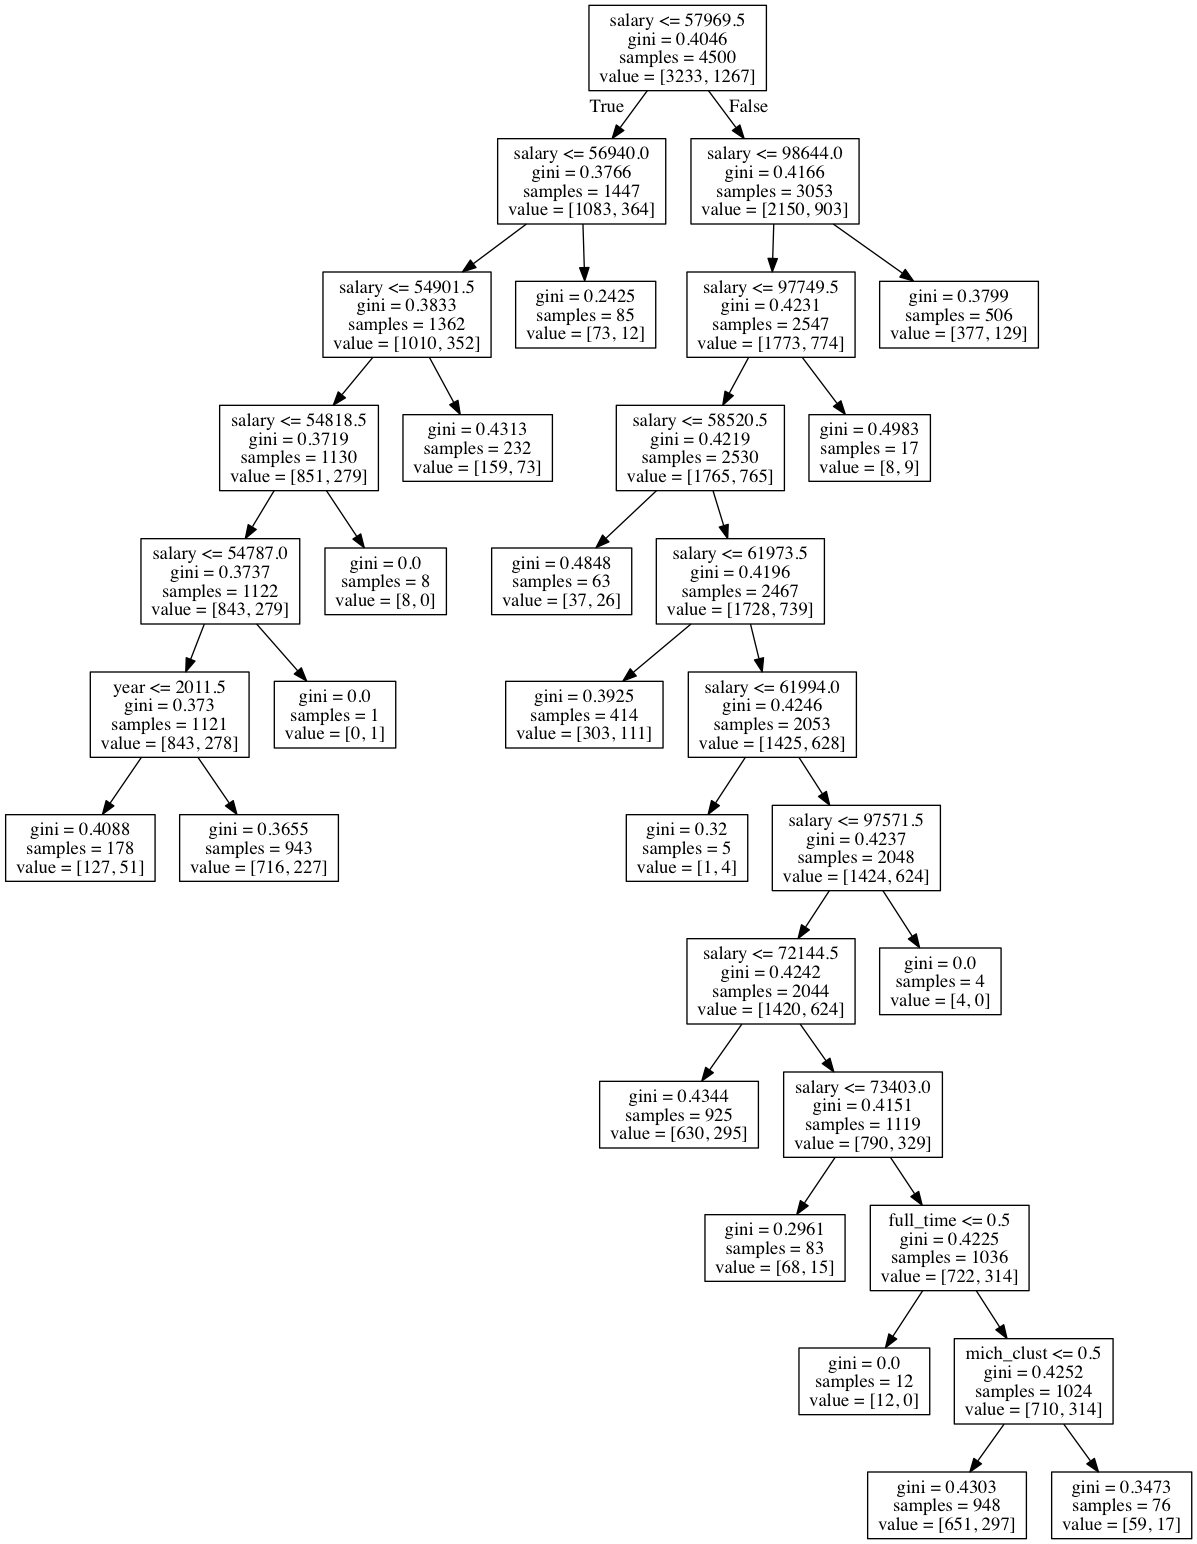

In [58]:
from sklearn import tree
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(dt, out_file=f)
import os
os.unlink('tree.dot')

import pydotplus 

dot_data = tree.export_graphviz(dt, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("tree.pdf")

m = list(X.columns)
from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=m)  
graph = pydotplus.graph_from_dot_data(dot_data)  
#Image(graph.create_png())
Image(graph.create_png())

#### Support Vector Machines

Tuning the kernel parameter for the 4 different types : linear, radial basis function, sigmoid and polynomial.
However, due to the shape of the data, only the radial basis function (RBF) kernel works.

In [20]:
cv_scores=[]
kf_total = KFold(n_splits = 10)
for train_index, test_index in kf_total.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm = SVC(kernel = "rbf")
    scores = cross_val_score(svm, X, y.values.ravel(), cv=kf_total.split(X), scoring='accuracy')
    cv_scores.append(scores.mean())

print('The accuracy of Support Vector Machines is :', round(max(cv_scores),3)*100,'for the radial basis function kernel ' )
# ------------------------------------------------------------------------------------------------------------------- #

cv_scores2=[]
kf_total = KFold(n_splits = 10)
for train_index, test_index in kf_total.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm = SVC(kernel = "poly")
    scores = cross_val_score(svm, X, y.values.ravel(), cv=kf_total.split(X), scoring='accuracy')
    cv_scores2.append(scores.mean())

print('The accuracy of Support Vector Machines is :', round(max(cv_scores2),3)*100,'for the polynomial kernel ' )


# ------------------------------------------------------------------------------------------------------------------- #

cv_scores3=[]
kf_total = KFold(n_splits = 10)
for train_index, test_index in kf_total.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm = SVC(kernel = "linear")
    scores = cross_val_score(svm, X, y.values.ravel(), cv=kf_total.split(X), scoring='accuracy')
    cv_scores3.append(scores.mean())

print('The accuracy of Support Vector Machines is :', round(max(cv_scores3),3)*100,'for the linear kernel ' )


# ------------------------------------------------------------------------------------------------------------------- #

cv_scores4=[]
kf_total = KFold(n_splits = 10)
for train_index, test_index in kf_total.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm = SVC(kernel = "sigmoid")
    scores = cross_val_score(svm, X, y.values.ravel(), cv=kf_total.split(X), scoring='accuracy')
    cv_scores4.append(scores.mean())

print('The accuracy of Support Vector Machines is :', round(max(cv_scores4),3)*100,'for the sigmoid kernel ' )




The accuracy of Support Vector Machines is : 68.8 for the radial basis function kernel 


 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

<a id='the_destination8'></a>
### 8. Modeling Observations and Conclusions


- The 10 fold CV method is more robust and is better able to handle changes in data.
- Directly out of the box, i.e. in stock condition, the Logistic Regression performs the best. So there is a lot more potential for fine tuning it to increase performance
- K Nearest Neighbors Classifier is a robust method and gives a solid 70.5% accuracy at being able to mimic the H-1B process.
- Support Vector Machines fail for 3 of the 4 kernels. 

 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

<a id='the_destination9'></a>
### 9. Questions Answered 

- How can the machine learning model be used?
    - It cannot be used to predict the actual outcome, however, given a certain area of application in the US, the probability of success can be estimated, i.e., an applicant in Texas has a greater chance of success than an applicant in Kansas. This however is useful for employers as they have many H-1B applications, for an individual however, it would be hard to say.
- Can the model be improved?
    - There is no lottery for foreign nationals working in a university or a non-profit organization. But considerable time is needed to look at the employer name variable to predict that and its quite cumbersome.
- What are the drawbacks of the model?
    - There is some data loss when creating the new feature variables. A few variables could not be used as it would require considerable data munging time.
- Is the current system flawed?
    - Yes.  About 88% of the applications make it through to the lottery but only 29% are approved but the demand for a skilled workforce remains the same.
- Prescriptions possible ~ how to improve the H1-B process?
    - Develop a dynamic system based on job requirements in the country. Such as a 'STEM-job model' which improves the number of approved applications as well  68% of H1-B’s are STEM related applications.
- Is there a dearth of foreign nationals? 
    - Yes. Only about 29% of total applications are approved. About 68% of applications are STEM applicants.  There is a need for foreign nationals as the number of applications increase yearly but the total approved remains constant.

- Implications for this year?
    - Infosys is out of the game this year as it has decided not to apply for H-1Bs. This frees up nearly 25,000 slots for other employers



 ### ------------------------------------------------------------------------------------------------------------------------------------- ###

